In [33]:
#Import Libraries
import pandas as pd
import sqlalchemy as sql
import numpy as np
import seaborn as sns
import os
import sys
script_dir = "/home/arun/Models"
# Add the absolute directory  path containing your
# module to the Python path
sys.path.append(os.path.abspath(script_dir))
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics
import lifelines as ll
from lifelines.utils import to_long_format

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Fit a time varying CoxPh

In [2]:
readCols =  ['prepay_flg','coborrow_flg','first_time_homebuyer_flag',
             'mortgage_insurance_type','occupancy_status','oltv','co_borrower_credit_score',
             'credit_score', 'dti', 'original_upb', 'FHPI', 'UE', 'IR','number_of_units',
             'original_interest_rate', 'original_loan_term', 'loan_sequence_number','loan_age']

In [3]:
#test     = pd.read_csv('/home/arun/Models/test.csv',header=0,nrows = 10**5)
train    = pd.read_csv('/home/arun/Models/train.csv',header=0,nrows = 15*10**6,usecols=readCols)
#validate = pd.read_csv('/home/arun/Models/validate.csv',header=0,nrows = 10**5)

In [4]:
import psutil

svmem = psutil.virtual_memory()
print (svmem.available)

28282933248


In [5]:
train.info()
#import pandas as pd
#%whos DataFrame
#del([train,relHazardFICO])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000000 entries, 0 to 14999999
Data columns (total 18 columns):
credit_score                 float64
first_time_homebuyer_flag    int64
number_of_units              int64
occupancy_status             int64
dti                          float64
original_upb                 float64
oltv                         float64
original_interest_rate       float64
loan_sequence_number         int64
original_loan_term           float64
co_borrower_credit_score     float64
mortgage_insurance_type      int64
prepay_flg                   int64
coborrow_flg                 int64
loan_age                     int64
FHPI                         float64
UE                           float64
IR                           float64
dtypes: float64(10), int64(8)
memory usage: 2.0 GB


In [6]:
train.columns

Index(['credit_score', 'first_time_homebuyer_flag', 'number_of_units',
       'occupancy_status', 'dti', 'original_upb', 'oltv',
       'original_interest_rate', 'loan_sequence_number', 'original_loan_term',
       'co_borrower_credit_score', 'mortgage_insurance_type', 'prepay_flg',
       'coborrow_flg', 'loan_age', 'FHPI', 'UE', 'IR'],
      dtype='object')

In [7]:
train.head(10)

,credit_score,first_time_homebuyer_flag,number_of_units,occupancy_status,dti,original_upb,oltv,original_interest_rate,loan_sequence_number,original_loan_term,co_borrower_credit_score,mortgage_insurance_type,prepay_flg,coborrow_flg,loan_age,FHPI,UE,IR
0,-0.49718,0,1,0,0.260064,-0.381559,0.145628,0.628699,100004082956,0.323145,-0.497898,0,0,0,8,-0.688064,-0.055701,0.569101
1,-0.49718,0,1,0,0.260064,-0.381559,0.145628,0.628699,100004082956,0.323145,-0.497898,0,0,0,9,-0.667490,0.003880,0.729499
2,-0.49718,0,1,0,0.260064,-0.381559,0.145628,0.628699,100004082956,0.323145,-0.497898,0,0,0,10,-0.643907,0.033671,0.702114
3,-0.49718,0,1,0,0.260064,-0.381559,0.145628,0.628699,100004082956,0.323145,-0.497898,0,0,0,11,-0.617384,0.063461,0.706026
4,-0.49718,0,1,0,0.260064,-0.381559,0.145628,0.628699,100004082956,0.323145,-0.497898,0,0,0,12,-0.599005,0.033671,0.698202
5,-0.49718,0,1,0,0.260064,-0.381559,0.145628,0.628699,100004082956,0.323145,-0.497898,0,0,0,13,-0.575862,0.033671,0.627783
6,-0.49718,0,1,0,0.260064,-0.381559,0.145628,0.628699,100004082956,0.323145,-0.497898,0,0,0,14,-0.556068,0.003880,0.565189
7,-0.49718,0,1,0,0.260064,-0.381559,0.145628,0.628699,100004082956,0.323145,-0.497898,0,0,0,15,-0.532410,0.003880,0.502594
8,-0.49718,0,1,0,0.260064,-0.381559,0.145628,0.628699,100004082956,0.323145,-0.497898,0,0,0,16,-0.532410,0.003880,0.502594
9,-0.49718,0,1,0,0.260064,-0.381559,0.145628,0.628699,100004082956,0.323145,-0.497898,0,0,0,17,-0.516066,0.003880,0.424351


In [8]:
train[train.loan_sequence_number==415068614629]

,credit_score,first_time_homebuyer_flag,number_of_units,occupancy_status,dti,original_upb,oltv,original_interest_rate,loan_sequence_number,original_loan_term,co_borrower_credit_score,mortgage_insurance_type,prepay_flg,coborrow_flg,loan_age,FHPI,UE,IR
2317492,-0.49718,0,1,0,-0.143782,-0.635778,-1.402102,1.007315,415068614629,0.323145,-0.497898,0,0,0,8,-0.749777,-0.420380,0.682553
2317493,-0.49718,0,1,0,-0.143782,-0.635778,-1.402102,1.007315,415068614629,0.323145,-0.497898,0,0,0,9,-0.749777,-0.420380,0.682553
2317494,-0.49718,0,1,0,-0.143782,-0.635778,-1.402102,1.007315,415068614629,0.323145,-0.497898,0,0,0,10,-0.734540,-0.380543,0.760796
2317495,-0.49718,0,1,0,-0.143782,-0.635778,-1.402102,1.007315,415068614629,0.323145,-0.497898,0,0,0,11,-0.734540,-0.380543,0.760796
2317496,-0.49718,0,1,0,-0.143782,-0.635778,-1.402102,1.007315,415068614629,0.323145,-0.497898,0,0,0,12,-0.719200,-0.320787,0.752972
2317497,-0.49718,0,1,0,-0.143782,-0.635778,-1.402102,1.007315,415068614629,0.323145,-0.497898,0,0,0,13,-0.719200,-0.320787,0.752972
2317498,-0.49718,0,1,0,-0.143782,-0.635778,-1.402102,1.007315,415068614629,0.323145,-0.497898,0,0,0,14,-0.711272,-0.280951,0.682553
2317499,-0.49718,0,1,0,-0.143782,-0.635778,-1.402102,1.007315,415068614629,0.323145,-0.497898,0,0,0,15,-0.702024,-0.241114,0.631695
2317500,-0.49718,0,1,0,-0.143782,-0.635778,-1.402102,1.007315,415068614629,0.323145,-0.497898,0,0,0,16,-0.692839,-0.201277,0.553452
2317501,-0.49718,0,1,0,-0.143782,-0.635778,-1.402102,1.007315,415068614629,0.323145,-0.497898,0,0,0,17,-0.683884,-0.161440,0.569101


In [9]:
import lifelines as ll
from lifelines.utils import to_long_format

train = pd.get_dummies(train, columns = ['number_of_units'], drop_first=True)
#train = pd.get_dummies(train, columns = ['number_of_borrowers'], drop_first=True)
train = to_long_format(train, duration_col="loan_age")


orig_vars = ['prepay_flg','coborrow_flg','first_time_homebuyer_flag',
             'mortgage_insurance_type','occupancy_status','oltv','co_borrower_credit_score',
             'credit_score', 'dti', 'original_upb', 'FHPI', 'UE', 'IR',
             'original_interest_rate', 'original_loan_term', 'loan_sequence_number','start','stop']

In [34]:
ll.__version__

'0.22.10'

In [11]:
train=train[orig_vars].sample(frac=1,random_state=4721)
#cph = ll.CoxPHFitter(penalizer=0.01)
cph = ll.CoxTimeVaryingFitter()
cph.fit(train, id_col="loan_sequence_number",start_col="start", stop_col="stop", event_col='prepay_flg', show_progress=True,step_size=0.5)

Iteration 8: norm_delta = 0.00000, step_size = 1.00000, ll = -7283538.27165, newton_decrement = 0.00000, seconds_since_start = 768.7Convergence completed after 8 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 15000000 periods, 497533 subjects, 480369 events>

In [11]:
train[pd.isnull(train).any(axis=1)]

,default_flg,coborrow_flg,first_time_homebuyer_flag,mortgage_insurance_type,occupancy_status,oltv,co_borrower_credit_score,credit_score,dti,original_upb,FHPI,UE,IR,original_interest_rate,original_loan_term,loan_sequence_number,start,stop


In [12]:
cph.print_summary()  # access the results using cph.summary

<lifelines.CoxTimeVaryingFitter: fitted with 15000000 periods, 497533 subjects, 480369 events>
         event col = 'prepay_flg'
number of subjects = 497533
 number of periods = 15000000
  number of events = 480369
    log-likelihood = -7283538.27
  time fit was run = 2019-12-08 18:24:21 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
coborrow_flg               -0.87       0.42       0.03            -0.93            -0.82                 0.39                 0.44
first_time_homebuyer_flag  -0.15       0.86       0.01            -0.16            -0.14                 0.85                 0.87
mortgage_insurance_type    -0.04       0.96       0.00            -0.05            -0.03                 0.95                 0.97
occupancy_status           -0.10       0.90       0.00            -0.11            -0.10                 0.89                 0.91
oltv                       -0.06       0.94    

In [13]:
cph.summary # access the results using cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
coborrow_flg,-0.873581,0.417454,0.029114,-0.930644,-0.816518,0.394300,0.441968,-30.005160,8.404528e-198,654.670596
first_time_homebuyer_flag,-0.154069,0.857213,0.005136,-0.164134,-0.144003,0.848628,0.865885,-30.000154,9.768176e-198,654.453674
mortgage_insurance_type,-0.042368,0.958517,0.004096,-0.050395,-0.034341,0.950853,0.966242,-10.344505,4.432008e-25,80.900242
occupancy_status,-0.104992,0.900332,0.003748,-0.112339,-0.097646,0.893741,0.906970,-28.010306,1.216977e-172,571.088330
oltv,-0.063355,0.938610,0.003988,-0.071171,-0.055539,0.931303,0.945975,-15.887671,7.714068e-57,186.402410
co_borrower_credit_score,0.931603,2.538575,0.030118,0.872573,0.990633,2.393060,2.692939,30.931766,4.469053e-210,695.444931
credit_score,0.078688,1.081867,0.002336,0.074109,0.083268,1.076924,1.086833,33.678076,1.210697e-248,823.562329
dti,0.021107,1.021332,0.002672,0.015870,0.026345,1.015997,1.026695,7.899023,2.810985e-15,48.337845
original_upb,1.587621,4.892098,0.004857,1.578102,1.597140,4.845751,4.938888,326.893026,0.000000e+00,inf
FHPI,-2.353500,0.095036,0.005144,-2.363582,-2.343418,0.094083,0.095999,-457.517110,0.000000e+00,inf


In [48]:
trainSet['credit_score'].quantile([0.6, 0.9])

0.6    0.006069
0.9    0.327588
Name: credit_score, dtype: float64

In [14]:
def hazard_multiplier(name):
    rangeVar = train[name].quantile([0.01, 0.99])
    vals = np.linspace(start=rangeVar[0.01], stop=rangeVar[0.99], num=50)
    #coef = cph.hazards_[name]
    coef = cph.params_[name]
    mean = np.mean(train[name])
    X = pd.DataFrame(vals)
    X.columns = [name]
    y = pd.DataFrame(X[name].apply(lambda x: np.exp((x-mean)*coef)))
    y.columns = ['Hazard Multiplier']
    haz = X.join(y)
    haz.columns = [name,'Hazard Multiplier']
    return(haz)

,baseline hazard
8,0.000212
9,0.000492
10,0.000846
11,0.001299
12,0.001876
13,0.002566
14,0.003370
15,0.004307
16,0.005424
17,0.006721


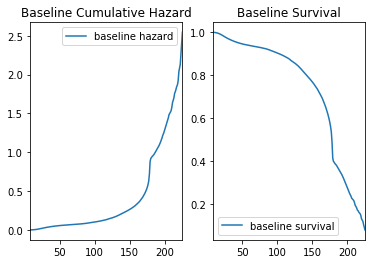

In [15]:
import matplotlib.pyplot as plt
#Plot the results
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
cph.baseline_cumulative_hazard_.plot(ax = axes[0], title = "Baseline Cumulative Hazard")
cph.baseline_survival_.plot(ax = axes[1], title = "Baseline Survival")

cph.baseline_cumulative_hazard_

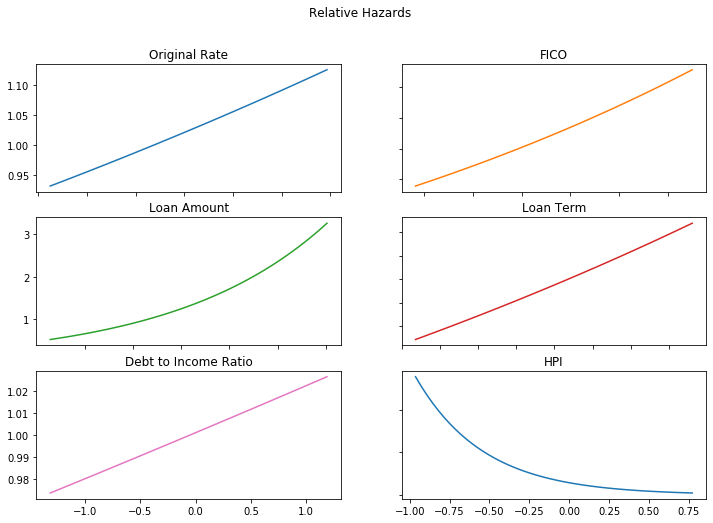

In [16]:
relHazardRate = hazard_multiplier('original_interest_rate')
relHazardFICO = hazard_multiplier('credit_score')
relHazardLoanamt = hazard_multiplier('original_upb')
relHazardTerm = hazard_multiplier('original_loan_term')
relHazarddti = hazard_multiplier('dti')
relHazardHPI = hazard_multiplier('FHPI')



#plt.plot(relHazardRate['original_interest_rate'],relHazardRate['Hazard Multiplier'])
#plt.plot(relHazardFICO['credit_score'],relHazardFICO['Hazard Multiplier'])


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6) ) = plt.subplots(3, 2,figsize=(12,8))
fig.suptitle('Relative Hazards')
ax1.plot(relHazardRate['original_interest_rate'],relHazardRate['Hazard Multiplier'])
ax1.set_title('Original Rate')
ax2.plot(relHazardFICO['credit_score'],relHazardFICO['Hazard Multiplier'], 'tab:orange')
ax2.set_title('FICO')
ax3.plot(relHazardLoanamt['original_upb'],relHazardLoanamt['Hazard Multiplier'], 'tab:green')
ax3.set_title('Loan Amount')
ax4.plot(relHazardTerm['original_loan_term'],relHazardTerm['Hazard Multiplier'], 'tab:red')
ax4.set_title('Loan Term')
ax5.plot(relHazarddti['dti'],relHazarddti['Hazard Multiplier'], 'tab:pink')
ax5.set_title('Debt to Income Ratio')
ax6.plot(relHazardHPI['FHPI'],relHazardHPI['Hazard Multiplier'], 'tab:blue')
ax6.set_title('HPI')

for ax in fig.get_axes():
    ax.label_outer()

In [17]:
import pickle
filename = '/home/arun/Models/coxPH_Model_prepay.sav'
pickle.dump(cph, open(filename, 'wb'))

#cph = pickle.load(open(filename, 'rb'))


In [18]:
test = pd.read_csv('/home/arun/Models/test.csv',header=0,nrows = 10**6)

test = to_long_format(test, duration_col="loan_age")

Xtest = test[orig_vars]

pHazard = cph.predict_partial_hazard(Xtest)
pHazard.columns = ['partialHazard']

In [20]:
Xtest[['loan_sequence_number','start','stop','prepay_flg']].head()

,loan_sequence_number,start,stop,prepay_flg
0,100009883013,0,8,0
1,100009883013,0,9,1
2,100040777887,0,8,0
3,100040777887,0,9,0
4,100040777887,0,10,0


In [22]:
allHazards = pHazard.join(Xtest[['loan_sequence_number','start','stop','prepay_flg']])

In [23]:
allHazards.head()

,partialHazard,loan_sequence_number,start,stop,prepay_flg
0,8.479948,100009883013,0,8,0
1,7.394919,100009883013,0,9,1
2,10.275498,100040777887,0,8,0
3,8.472679,100040777887,0,9,0
4,8.316350,100040777887,0,10,0


In [24]:
cph.baseline_cumulative_hazard_

,baseline hazard
8,0.000212
9,0.000492
10,0.000846
11,0.001299
12,0.001876
13,0.002566
14,0.003370
15,0.004307
16,0.005424
17,0.006721


In [25]:
#baselineSurvival = (cph.baseline_survival_).reset_index()
baselineSurvival = (cph.baseline_cumulative_hazard_).reset_index()
baselineSurvival.columns = ['stop','baseLineHazard']
baselineSurvival['baselineHazard'] = baselineSurvival.baseLineHazard.diff()
baselineSurvival[np.isnan(baselineSurvival)] = 0
baselineSurvival

,stop,baseLineHazard,baselineHazard
0,8,0.000212,0.000000
1,9,0.000492,0.000280
2,10,0.000846,0.000354
3,11,0.001299,0.000453
4,12,0.001876,0.000578
5,13,0.002566,0.000690
6,14,0.003370,0.000804
7,15,0.004307,0.000937
8,16,0.005424,0.001118
9,17,0.006721,0.001296


In [28]:
allHazards = pd.merge(allHazards,baselineSurvival,on='stop')
allHazards['hazard'] = (allHazards['baseLineHazard'].pow(allHazards['partialHazard']))
allHazards['Surv'] = np.exp(-1*allHazards.hazard)

In [29]:
allHazards[allHazards.prepay_flg==1].head(1000)

,partialHazard,loan_sequence_number,start,stop,prepay_flg,baseLineHazard_x,baselineHazard_x,hazard,Surv,baseLineHazard_y,baselineHazard_y,baseLineHazard,baselineHazard
11,28.863641,100208676120,0,8,1,0.000212,0.00000,8.787583e-107,1.000000,0.000212,0.00000,0.000212,0.00000
27,14.580202,100404784046,0,8,1,0.000212,0.00000,2.671308e-54,1.000000,0.000212,0.00000,0.000212,0.00000
63,10.037577,100968403210,0,8,1,0.000212,0.00000,1.312433e-37,1.000000,0.000212,0.00000,0.000212,0.00000
87,6.769376,101326759633,0,8,1,0.000212,0.00000,1.338771e-25,1.000000,0.000212,0.00000,0.000212,0.00000
105,1.620867,101542405428,0,8,1,0.000212,0.00000,1.107411e-06,0.999999,0.000212,0.00000,0.000212,0.00000
121,4.940060,101779706765,0,8,1,0.000212,0.00000,7.052070e-19,1.000000,0.000212,0.00000,0.000212,0.00000
152,12.719090,102079444483,0,8,1,0.000212,0.00000,1.841477e-47,1.000000,0.000212,0.00000,0.000212,0.00000
159,3.424094,102193851763,0,8,1,0.000212,0.00000,2.621568e-13,1.000000,0.000212,0.00000,0.000212,0.00000
182,4.786426,102494554953,0,8,1,0.000212,0.00000,2.587191e-18,1.000000,0.000212,0.00000,0.000212,0.00000
228,22.451784,103130846120,0,8,1,0.000212,0.00000,3.187865e-83,1.000000,0.000212,0.00000,0.000212,0.00000


In [30]:
lastStatus = allHazards.sort_values('stop').groupby('loan_sequence_number').tail(1)

In [31]:
lastStatus.shape

(37658, 13)

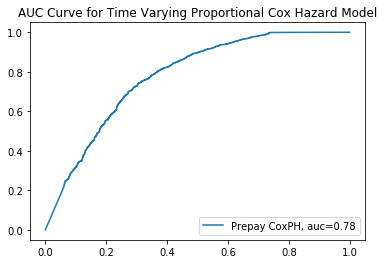

In [36]:
from sklearn.metrics import roc_auc_score
y_true = lastStatus['prepay_flg']
y_scores = lastStatus['Surv']
auc = round(roc_auc_score(y_true, y_scores),2)

fpr, tpr, thresh = metrics.roc_curve(y_true, y_scores)
plt.plot(fpr,tpr,label="Prepay CoxPH, auc="+str(auc))
plt.title("AUC Curve for Time Varying Proportional Cox Hazard Model")
plt.legend(loc=4)
plt.show()

In [39]:
y_pred  = (y_scores<0.5)*1
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.9404376228158692


In [43]:
lastStatus[lastStatus.stop>20].head()

,partialHazard,loan_sequence_number,start,stop,prepay_flg,baseLineHazard_x,baselineHazard_x,hazard,Surv,baseLineHazard_y,baselineHazard_y,baseLineHazard,baselineHazard
424106,0.332331,462408775344,0,21,1,0.01353,0.00186,2.393169e-01,0.787165,0.01353,0.00186,0.01353,0.00186
424119,1.831614,462910369366,0,21,1,0.01353,0.00186,3.778029e-04,0.999622,0.01353,0.00186,0.01353,0.00186
424140,9.354768,463376368870,0,21,1,0.01353,0.00186,3.301881e-18,1.000000,0.01353,0.00186,0.01353,0.00186
424136,16.080413,463322629117,0,21,1,0.01353,0.00186,8.924017e-31,1.000000,0.01353,0.00186,0.01353,0.00186
424225,7.441483,465528083714,0,21,1,0.01353,0.00186,1.241979e-14,1.000000,0.01353,0.00186,0.01353,0.00186


In [37]:
allHazards[allHazards.loan_sequence_number==527563511071]

,partialHazard,loan_sequence_number,start,stop,prepay_flg,baseLineHazard_x,baselineHazard_x,hazard,Surv,baseLineHazard_y,baselineHazard_y,baseLineHazard,baselineHazard
29265,1.447367,527563511071,0,8,0,0.000212,0.000000,0.000005,0.999995,0.000212,0.000000,0.000212,0.000000
65999,1.369858,527563511071,0,9,0,0.000492,0.000280,0.000029,0.999971,0.000492,0.000280,0.000492,0.000280
101907,1.674283,527563511071,0,10,0,0.000846,0.000354,0.000007,0.999993,0.000846,0.000354,0.000846,0.000354
136944,1.432679,527563511071,0,11,0,0.001299,0.000453,0.000073,0.999927,0.001299,0.000453,0.001299,0.000453
170963,1.302811,527563511071,0,12,0,0.001876,0.000578,0.000280,0.999720,0.001876,0.000578,0.001876,0.000578
203962,1.302811,527563511071,0,13,0,0.002566,0.000690,0.000421,0.999579,0.002566,0.000690,0.002566,0.000690
235933,1.102032,527563511071,0,14,0,0.003370,0.000804,0.001885,0.998117,0.003370,0.000804,0.003370,0.000804
266831,1.102032,527563511071,0,15,0,0.004307,0.000937,0.002470,0.997533,0.004307,0.000937,0.004307,0.000937
296600,0.955206,527563511071,0,16,0,0.005424,0.001118,0.006852,0.993171,0.005424,0.001118,0.005424,0.001118
325209,0.837263,527563511071,0,17,0,0.006721,0.001296,0.015169,0.984945,0.006721,0.001296,0.006721,0.001296


In [6]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

explanatoryVars = [
       'credit_score', 'first_time_homebuyer_flag', 'mip', 'number_of_units',
       'occupancy_status', 'ocltv', 'dti', 'original_upb', 'oltv',
       'original_interest_rate', 'property_type',
        'original_loan_term',
       'number_of_borrowers',  'sato',
       'co_borrower_credit_score', 'mortgage_insurance_type',
       'relocation_mortgage_indicator', 'coborrow_flg',
       'modification_flag','loan_age',
       'FHPI', 'MedianUnitPrice', 'UE', 'IR', 'Points']

pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

smoteTrain = pd.read_csv('/home/arun/Models/train.csv',header=0,nrows = 10**6)
y = smoteTrain['default_flg']*2 + smoteTrain['prepay_flg']
X = smoteTrain[explanatoryVars]

# Fit..
pipe.fit(X, y)

# Predict..
y_pred = pipe.predict(X)

# Evaluate the model
print(classification_report(y, y_pred))
plot_confusion_matrix(confusion_matrix(y, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.39      0.55    959852
           1       0.06      0.52      0.11     39553
           2       0.00      0.70      0.00       595

    accuracy                           0.39   1000000
   macro avg       0.34      0.54      0.22   1000000
weighted avg       0.93      0.39      0.54   1000000



NameError: name 'plot_confusion_matrix' is not defined

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf99214190>)

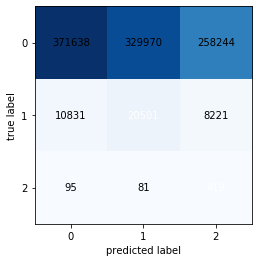

In [8]:
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
plot_confusion_matrix(confusion_matrix(y, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

Best parameters : {'class_weight': {0: 0.05, 1: 0.05, 2: 0.9}}


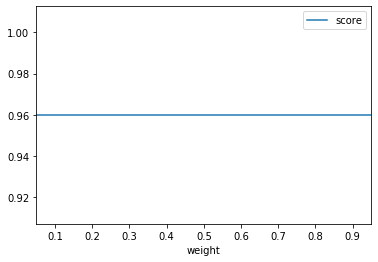

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.utils import compute_sample_weight
sample_weight = compute_sample_weight('balanced', y_train)

weights = np.linspace(0.05, 0.95, 20)

my_scorer = make_scorer(f1_score, greater_is_better=True, average='micro')

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: x, 2: 1-2*x} for x in weights]
    },
    scoring=my_scorer,
    cv=3
)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [12]:
from sklearn.utils import compute_sample_weight
import numpy as np
sample_weight = compute_sample_weight('balanced',np.unique(y),y)

In [13]:
sample_weight

array([3.43830265e-01, 1.11452714e+01, 5.36466297e+02])

In [14]:
allexplanatoryVars = [
       'credit_score', 'first_time_homebuyer_flag', 'mip', 'number_of_units',
       'occupancy_status', 'ocltv', 'dti', 'original_upb', 'oltv',
       'original_interest_rate', 'channel', 'property_state', 'property_type',
       'loan_sequence_number', 'loan_purpose', 'original_loan_term',
       'number_of_borrowers', 'servicer_id', 'sato',
       'co_borrower_credit_score', 'mortgage_insurance_type',
       'relocation_mortgage_indicator', 'default_flg', 'default_bal',
       'prepay_flg', 'default_payoff', 'servicer_default_grp',
       'servicer_prepay_grp', 'loan_age_payoff', 'loan_age_default',
       'vintage_yr', 'Date', 'coborrow_flg', 'State', 'validation_flag',
       'test_train']

explanatoryVars = [
       'credit_score', 'first_time_homebuyer_flag', 'mip', 'number_of_units',
       'occupancy_status', 'ocltv', 'dti', 'original_upb', 'oltv',
       'original_interest_rate', 'property_type',
        'original_loan_term',
       'number_of_borrowers',  'sato',
       'co_borrower_credit_score', 'mortgage_insurance_type',
       'relocation_mortgage_indicator', 'coborrow_flg',
       'modification_flag','loan_age',
       'FHPI', 'MedianUnitPrice', 'UE', 'IR', 'Points']

y = train['default_flg']*2 + train['prepay_flg']
X = train[explanatoryVars]

lr = LogisticRegression(class_weight= {0: 3.43830265e-01, 1: 1.11452714e+01, 2: 5.36466297e+02}).fit(X, y)
yhat = lr.predict(X)


#sgd = SGDClassifier(loss = 'log').fit(X,y)
#yhatSGD = sgd.predict(X)
#print mySGDlr.score(X, ravel(Y))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
pd.DataFrame(yhat).head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [16]:
yhat = lr.predict(X)
yhat = pd.DataFrame(yhat)

yhat.columns = ['predicted']

print(accuracy_score(y, yhat))
cm_lr = confusion_matrix(y, yhat)
print(cm_lr.diagonal()/cm_lr.sum(axis=1))

0.96853525
[9.99026170e-01 1.03651024e-04 9.09310373e-03]


In [22]:
yhat[yhat.predicted==2].sum()

ypd= pd.DataFrame(y)
ypd.columns = ['actual']
ypd[ypd.actual==2].sum()time

predicted    37696
dtype: int64

In [20]:
yhat = lr.predict(X)
yhat = pd.DataFrame(yhat)

yhatSGD = sgd.predict(X)
yhatSGD = pd.DataFrame(yhatSGD)

yhat.columns = ['predicted']
yhatSGD.columns = ['predicted']

print(accuracy_score(y, yhat), accuracy_score(y, yhatSGD))
cm_lr = confusion_matrix(y, yhat)
print(cm_lr.diagonal()/cm_lr.sum(axis=1))

cm_sgd = confusion_matrix(y, yhatSGD)
print(cm_sgd.diagonal()/cm_sgd.sum(axis=1))

In [21]:
print(pd.DataFrame(y).head(300),pd.DataFrame(yhat).head(300),pd.DataFrame(yhatSGD).head(300))

     0
0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
10   0
11   0
12   0
13   0
14   0
15   1
16   0
17   0
18   0
19   0
20   0
21   0
22   0
23   0
24   0
25   0
26   0
27   0
28   1
29   0
30   0
31   1
32   0
33   0
34   0
35   0
36   0
37   1
38   0
39   0
40   0
41   0
42   0
43   0
44   0
45   0
46   0
47   0
48   1
49   0
50   0
51   0
52   0
53   0
54   0
55   0
56   0
57   0
58   0
59   0
60   0
61   0
62   0
63   0
64   1
65   0
66   0
67   0
68   1
69   0
70   0
71   0
72   0
73   0
74   0
75   0
76   0
77   0
78   1
79   0
80   0
81   1
82   0
83   0
84   0
85   0
86   0
87   0
88   0
89   0
90   0
91   0
92   0
93   0
94   0
95   0
96   0
97   0
98   0
99   0
100  0
101  0
102  0
103  0
104  0
105  0
106  0
107  0
108  0
109  0
110  1
111  0
112  0
113  1
114  0
115  1
116  0
117  0
118  0
119  0
120  0
121  0
122  0
123  0
124  0
125  0
126  0
127  0
128  0
129  0
130  0
131  0
132  0
133  0
134  0
135  0
136  0
137  0
138  0
139  1
140  0
141  0

In [12]:
ytest = test['default_flg']*2 + test['prepay_flg']
Xtest = test[explanatoryVars]

yhattest = lr.predict(Xtest)
yhattest = pd.DataFrame(yhattest)

yhatSGDtest = sgd.predict(Xtest)
yhatSGDtest = pd.DataFrame(yhatSGDtest)

yhattest.columns = ['predicted']
yhatSGDtest.columns = ['predicted']

from sklearn.metrics import accuracy_score

print(accuracy_score(ytest, yhattest), accuracy_score(ytest, yhatSGDtest))

cm_lr = confusion_matrix(ytest, yhattest)
print(cm_lr.diagonal()/cm_lr.sum(axis=1))

cm_sgd = confusion_matrix(ytest, yhatSGDtest)
print(cm_sgd.diagonal()/cm_sgd.sum(axis=1))

0.7993506507814445 0.8001549007467406
[0.48933915 0.92006099 0.00161856]
[0.50319524 0.91710501 0.00123319]


In [15]:
validate = validationSet
yval = validate['default_flg']*2 + validate['prepay_flg']
Xval = validate[explanatoryVars]

yhatval = lr.predict(Xval)
yhatval = pd.DataFrame(yhatval)

yhatSGDval = sgd.predict(Xval)
yhatSGDval = pd.DataFrame(yhatSGDval)

yhatval.columns = ['predicted']
yhatSGDval.columns = ['predicted']


print(accuracy_score(yval, yhatval), accuracy_score(yval, yhatSGDval))

cm_lr = confusion_matrix(yval, yhatval)
print(cm_lr.diagonal()/cm_lr.sum(axis=1))

cm_sgd = confusion_matrix(yval, yhatSGDval)
print(cm_sgd.diagonal()/cm_sgd.sum(axis=1))

0.6877500752798352 0.6991514500304369
[0.72475189 0.35135996 0.        ]
[0.73890926 0.33686127 0.        ]


In [ ]:
y_pred_proba = lr.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [94]:
train.columns

Index(['credit_score', 'first_time_homebuyer_flag', 'mip', 'number_of_units',
       'occupancy_status', 'ocltv', 'dti', 'original_upb', 'oltv',
       'original_interest_rate', 'channel', 'property_state', 'property_type',
       'loan_sequence_number', 'loan_purpose', 'original_loan_term',
       'number_of_borrowers', 'servicer_id', 'sato',
       'co_borrower_credit_score', 'mortgage_insurance_type',
       'relocation_mortgage_indicator', 'default_flg', 'default_bal',
       'prepay_flg', 'default_payoff', 'servicer_default_grp',
       'servicer_prepay_grp', 'loan_age_payoff', 'loan_age_default',
       'vintage_yr', 'Date', 'coborrow_flg', 'State', 'validation_flag',
       'test_train'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train.columns.values

In [ ]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "tf.float32"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "tf.float32"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    X = tf.placeholder(tf.float32, shape=(n_x, None), name='X')
    Y = tf.placeholder(tf.float32, shape=(n_y, None), name='Y')
    
    return X, Y

In [ ]:
def initialize_parameters(n_x, n_1, n_2, n_y, scale_w=1):
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [n_1, n_x]
                        b1 : [n_1, 1]
                        W2 : [n_2, n_1]
                        b2 : [n_2, 1]
                        W3 : [n_y, n_2]
                        b3 : [n_y, 1]
    
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = scale_w * tf.get_variable('W1', [n_1, n_x], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable('b1', [n_1, 1], initializer=tf.zeros_initializer())
    W2 = scale_w * tf.get_variable('W2', [n_2, n_1], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable('b2', [n_2, 1], initializer=tf.zeros_initializer())
    W3 = scale_w * tf.get_variable('W3', [n_y, n_2], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable('b3', [n_y, 1], initializer=tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [ ]:
def forward_propagation(X, parameters, act_func=tf.nn.relu):
    """
    Implements the forward propagation for the model: LINEAR -> TANH -> LINEAR -> TANH -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                                             # Z1 = np.dot(W1, X) + b1
    A1 = act_func(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                                     # Z2 = np.dot(W2, A1) + b2
    A2 = act_func(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                                              # Z3 = np.dot(W3, A2) + b3
    ### END CODE HERE ###
    
    return Z3

In [ ]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    ### END CODE HERE ###
    
    return cost

In [ ]:
def model(X_train, Y_train, X_test, Y_test, act_func=tf.nn.relu, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 50, print_cost = True, scale_w=1):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                  # (n_x: input size, m : number of examples in the train set)
    n_1 = 20
    n_2 = 10
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters(n_x, n_1, n_2, n_y, scale_w) # not good practice to have fixed size parameter initialization
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters, act_func)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

In [ ]:
sub_train = train.sample(1000000)
sub_test = test
Y_train = pd.DataFrame(sub_train.pop('default_flg'))
Y_train['prepay_flg'] = sub_train.pop('prepay_flg')
Y_train['other'] = ((Y_train.default_flg + Y_train.prepay_flg) == 0)*1
Y_test = pd.DataFrame(sub_test.pop('default_flg'))
Y_test['prepay_flg'] = sub_test.pop('prepay_flg')
Y_test['other'] = ((Y_test.default_flg + Y_test.prepay_flg) == 0)*1

In [ ]:
X_train = sub_train.values.T
Y_train = Y_train.values.T
X_test = sub_test.values.T
Y_test = Y_test.values.T

In [ ]:
# Ran with ReLU and realized doesn't work well with continuous data centered about 0
# parameters = model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, minibatch_size=512, scale_w=0.01)

In [ ]:
parameters = model(X_train, Y_train, X_test, Y_test, act_func=tf.nn.tanh, learning_rate = 0.000001, minibatch_size=2048)